# Benford law and fraud analysis


In [1]:
# packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

In [2]:
# dataset
data = pd.read_csv("/home/andressa/Desktop/Pastas/Blogs/archive/creditcard.csv")

### Descriptive Analysis

In [ ]:
# shape of the dataset
data.shape

In [ ]:
# columns names
data.columns

In [ ]:
# head of the dataset
data.head()

In [ ]:
# summary
data.iloc[:,0:data.shape[1]-1].describe()

In [ ]:
# study Class variable
np.unique(data.Class)

In [ ]:
data.groupby("Class").count().iloc[:,0]

In [ ]:
print("Normal: ", round((data.groupby("Class").count().iloc[0,0]/data.shape[0])*100,2))
print("Fraud: ", round((data.groupby("Class").count().iloc[1,0]/data.shape[0])*100,2))

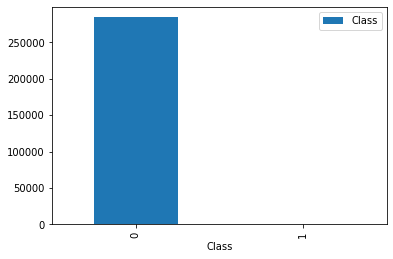

In [30]:
# plot
a = pd.DataFrame(data.groupby("Class").count().iloc[:,0])
a.columns = ["Class"]
a.plot.bar()

In [ ]:
# split normal (Class = 0)  and fraud (Class = 1)

normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

a = plt.figure(num=None, figsize=(10, 6))

a1 = a.add_subplot(121)
a1.hist(normal.Amount)
a1.title.set_text('Normal')

a2 = a.add_subplot(122)
a2.hist(fraud.Amount)
a2.title.set_text('Fraud')

plt.tight_layout()
plt.show()

### Complex analysis

In [ ]:
# filtering values greater than 0
aux = data.Amount[data.Amount > 0]
aux

In [ ]:
# taking the first digit
aux = aux.apply(lambda elem: elem // 10**(len(str(math.floor(elem))) - 1))
aux

In [ ]:
# calculate the frequency
qt_numbers = aux.value_counts()
qt_numbers

In [ ]:
percent = qt_numbers.apply(lambda elem: (elem/aux.count())*100)
percent

In [ ]:
# transforming exponential value
result = pd.Series()
for i in range(1,10):
     result.at[i] = round(math.log(1 + 1/i,10) * 100,2)
result

In [ ]:
# plot

data2 = pd.DataFrame(columns=['Fit', 'Origin'])
data2['Fit'] = result
data2['Origin'] = percent
        
print('Expected frequencies :\n', result.sort_index(), '\n')
print('Real frequencies:\n',percent.sort_index())

data2.plot.bar(figsize = (10,6))

In [ ]:
# deep analysis

aux2 = fraud.Amount

aux2 = aux2[aux2 > 0].apply(lambda elem: elem // 10**(len(str(math.floor(elem))) - 1)).value_counts()
aux2

In [ ]:
fraud.Amount.describe()